In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Shape of dataset
df.shape

(7043, 21)

In [3]:
# Column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# Data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Statistical summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


DATA CLEANING 

In [6]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [8]:
binary_cols = ['Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

Tenure Group

In [9]:
df['Tenure_Group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1 Year', '1-2 Years', '2-4 Years', '4-6 Years']
)

Monthly Charge Level

In [10]:
df['MonthlyCharge_Level'] = pd.cut(
    df['MonthlyCharges'],
    bins=[0, 35, 70, 120],
    labels=['Low', 'Medium', 'High']
)

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customerID           7043 non-null   object  
 1   gender               7043 non-null   object  
 2   SeniorCitizen        7043 non-null   int64   
 3   Partner              7043 non-null   int64   
 4   Dependents           7043 non-null   int64   
 5   tenure               7043 non-null   int64   
 6   PhoneService         7043 non-null   int64   
 7   MultipleLines        7043 non-null   object  
 8   InternetService      7043 non-null   object  
 9   OnlineSecurity       7043 non-null   object  
 10  OnlineBackup         7043 non-null   object  
 11  DeviceProtection     7043 non-null   object  
 12  TechSupport          7043 non-null   object  
 13  StreamingTV          7043 non-null   object  
 14  StreamingMovies      7043 non-null   object  
 15  Contract             

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group,MonthlyCharge_Level
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0-1 Year,Low
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,No,No,One year,0,Mailed check,56.95,1889.50,0,2-4 Years,Medium
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0-1 Year,Medium
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,2-4 Years,Medium
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0-1 Year,High


Exploratory Data Analysis 

What percentage of customers are leaving?

In [12]:
churn_rate = df['Churn'].mean() * 100
churn_rate

26.536987079369588

This is high for a subscription business

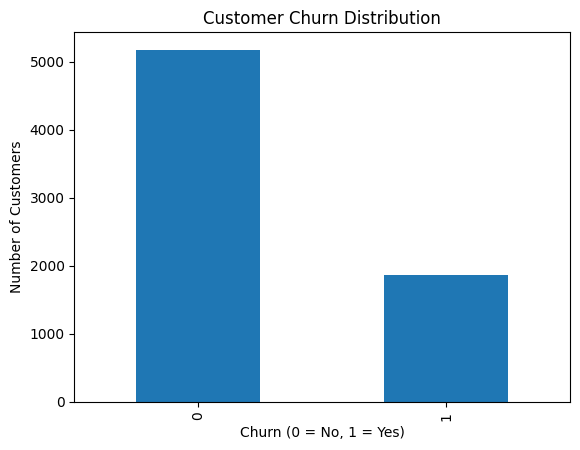

In [13]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar')
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

Does contract type affect churn?

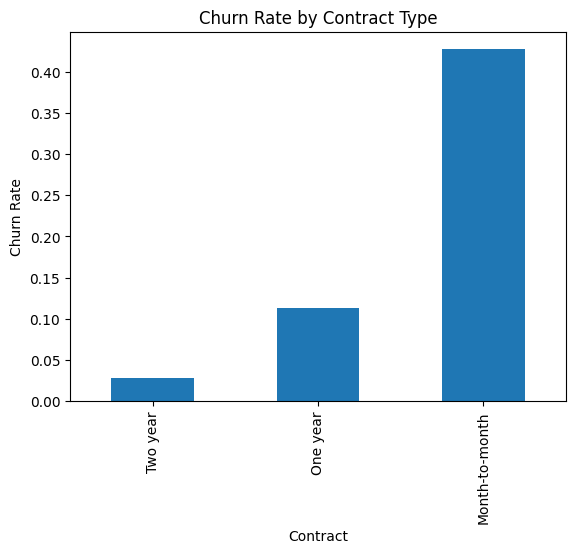

In [14]:
contract_churn = df.groupby('Contract')['Churn'].mean().sort_values()

contract_churn.plot(kind='bar')
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()

Month-to-month customers churn the most

Long-term contracts retain customers better

Do higher bills increase churn?

C:\Users\Daivansh\AppData\Local\Temp\ipykernel_22312\208339369.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('MonthlyCharge_Level')['Churn'].mean().plot(kind='bar')


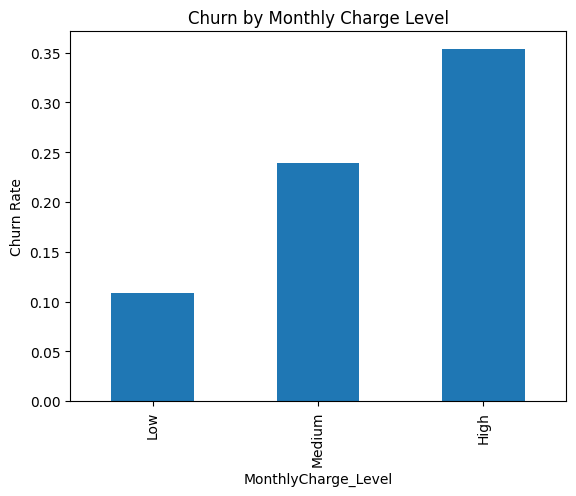

In [15]:
df.groupby('MonthlyCharge_Level')['Churn'].mean().plot(kind='bar')
plt.title("Churn by Monthly Charge Level")
plt.ylabel("Churn Rate")
plt.show()

High monthly charges -> higher churn

C:\Users\Daivansh\AppData\Local\Temp\ipykernel_22312\3806069276.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Tenure_Group')['Churn'].mean().plot(kind='bar')


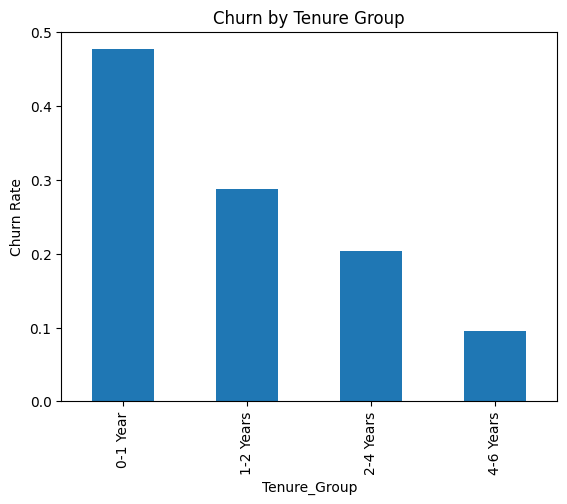

In [16]:
df.groupby('Tenure_Group')['Churn'].mean().plot(kind='bar')
plt.title("Churn by Tenure Group")
plt.ylabel("Churn Rate")
plt.show()

New customers churn much more

How much revenue is lost due to churn?

In [17]:
revenue_churn = df.groupby('Churn')['MonthlyCharges'].mean()
revenue_churn

Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64

Churned customers often have higher charges

Losing them hurts revenue disproportionately

In [18]:
services = ['OnlineSecurity', 'TechSupport', 'StreamingTV']

for service in services:
    churn_service = df.groupby(service)['Churn'].mean()
    print(f"\nChurn by {service}:\n", churn_service)


Churn by OnlineSecurity:
 OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn, dtype: float64

Churn by TechSupport:
 TechSupport
No                     0.416355
No internet service    0.074050
Yes                    0.151663
Name: Churn, dtype: float64

Churn by StreamingTV:
 StreamingTV
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: Churn, dtype: float64


Customers without Tech Support churn more

Value-added services improve retention

In [19]:
df.to_csv("../data/telco_churn_mysql.csv", index=False)